In [16]:
#encoding=utf-8
import codecs
import sklearn
import numpy as np
import scipy
import pandas as pd
import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [63]:
f = codecs.open("./out/t/val_emb.csv", "r", encoding="utf-8")
names = []
emb_array = []
for line in f:
    t = line.strip().split()
    name, a = t[0], t[1:]
    emb_array.append(list(map(float, a)))
    names.append(name)
emb_array = np.array(emb_array, dtype=np.float32)
names = np.array(names)

In [56]:
emb_array

array([[1.40927792e+00, 5.70023060e-01, 7.21558809e+00, ...,
        1.57719944e-02, 6.40672733e-05, 1.68651867e+01],
       [4.05107766e-01, 4.53865826e-01, 7.78785849e+00, ...,
        5.37322229e-03, 5.37996704e-04, 1.82627277e+01],
       [6.59171104e-01, 7.21070349e-01, 8.21532822e+00, ...,
        1.24665359e-02, 0.00000000e+00, 1.90338802e+01],
       ...,
       [1.81478977e-01, 2.52397627e-01, 1.09011726e+01, ...,
        0.00000000e+00, 0.00000000e+00, 2.63114262e+01],
       [3.64631891e-01, 3.28249454e-01, 1.00546570e+01, ...,
        0.00000000e+00, 0.00000000e+00, 2.43663044e+01],
       [1.43925917e+00, 1.81964502e-01, 1.02379055e+01, ...,
        7.98687339e-02, 0.00000000e+00, 2.46839447e+01]], dtype=float32)

In [25]:
from sklearn.manifold import TSNE

In [66]:
tsne = TSNE(n_components=2, verbose=1, n_iter=1000)
tsne_results = tsne.fit_transform(emb_array)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1303 samples in 0.006s...
[t-SNE] Computed neighbors for 1303 samples in 0.252s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1303
[t-SNE] Computed conditional probabilities for sample 1303 / 1303
[t-SNE] Mean sigma: 0.995812
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.371361
[t-SNE] Error after 1000 iterations: 0.885601


In [59]:
tsne_results

array([[-38.139114  ,   0.74077374],
       [ -3.8532896 ,  29.794996  ],
       [ -3.7202053 ,  21.077639  ],
       ...,
       [ -0.23296705, -33.19581   ],
       [ -0.60346544, -30.378414  ],
       [ -4.8574777 , -29.66871   ]], dtype=float32)

In [60]:
names_unique = list(set(names))
colors =  'r', 'g', 'b', 'c', 'm', 'y', 'k', 'cyan', 'orange', 'purple', "yellow", "pink", "olive", "violet"
colors = colors[0:len(names_unique)]
name2color = dict( zip(names_unique, colors))

In [35]:
color_list = [name2color[v] for v in names]

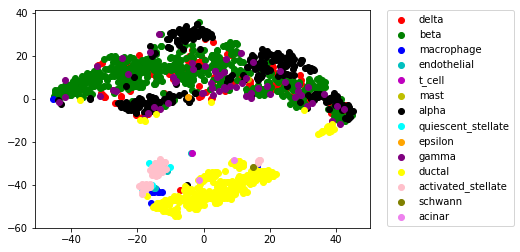

In [67]:
vis_x = tsne_results[:, 0]
vis_y = tsne_results[:, 1]
# plt.scatter(vis_x, vis_y, c=y_data, cmap=plt.cm.get_cmap("jet", 10))
for name, color in zip(names_unique, colors):
    index = (names == name)
    plt.scatter( vis_x[index], vis_y[index], c = color, label = name)
# plt.scatter(vis_x, vis_y, c=color_list)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [2]:
import utils

In [11]:
adj = [ [1,2,3],[0,2,1],[3,4,0] ]
adj = np.array(adj)
row, col, val = utils.preprocess_adj(adj)
row = np.array(row, dtype=np.int32)
col = np.array(col, dtype=np.int32)
val = np.array(val, dtype=np.float32)
input_data, feed_dict = utils.load_sparse_data("t", [row, col, val])

In [14]:
row.dtype, col.dtype, val.dtype

(dtype('int32'), dtype('int32'), dtype('float32'))

In [16]:
x = tf.constant(np.array([ [1,2,3] ], dtype=np.int32), dtype=tf.int32)
sess.run(x)

array([[1, 2, 3]])

In [6]:
sess = tf.Session()

In [3]:
df = pd.read_csv("./out/t/log.csv")

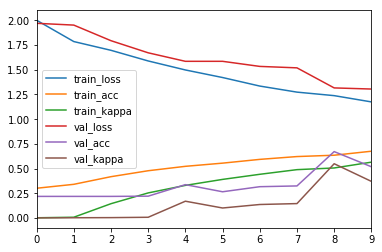

In [5]:
df.plot()